In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
file_list = os.listdir("/works/Data/Dacon/health_data_clf/")
file_list = [file for file in file_list if file.endswith(".csv")]
print(file_list)

['train_labels.csv', 'test_features.csv', 'train_features.csv', 'sample_submission.csv']


In [3]:
file_path = "/works/Data/Dacon/health_data_clf/"
train_label = pd.read_csv(file_path + file_list[0])
test_features = pd.read_csv(file_path + file_list[1])
train_features = pd.read_csv(file_path + file_list[2])
sample_submissuib = pd.read_csv(file_path + file_list[3])

print(train_label.shape)
print(test_features.shape)
print(train_features.shape)

(3125, 3)
(469200, 8)
(1875000, 8)


In [4]:
train_features.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234


# Make feature using static

In [5]:
input_set = []
target_set = []
for id_idx in range(train_features.id.min(), train_features.id.max()+1):
    #Chack empty id
    if train_features[train_features.id==id_idx].shape[0]==0:
        continue
    
    sample_set_by_id = train_features[train_features.id==id_idx]
    ################################################################ Acc Data ##########################
    #Caculate Mean value
    mx = sample_set_by_id.acc_x.mean()
    my = sample_set_by_id.acc_y.mean()
    mz = sample_set_by_id.acc_z.mean()
    
    #Caculate ABS Mean value
    mx_abs = abs(sample_set_by_id.acc_x).mean()
    my_abs = abs(sample_set_by_id.acc_y).mean()
    mz_abs = abs(sample_set_by_id.acc_z).mean()
    
    #Caculate STD Value
    sx = sample_set_by_id.acc_x.std()
    sy = sample_set_by_id.acc_y.std()
    sz = sample_set_by_id.acc_z.std()
    
    #Caculate Cov value
    cxy = np.cov(sample_set_by_id[["acc_x","acc_y"]].values.T)[0][1]
    cyz = np.cov(sample_set_by_id[["acc_y","acc_z"]].values.T)[0][1]
    czx = np.cov(sample_set_by_id[["acc_z","acc_x"]].values.T)[0][1]
    
    #Caculate Corr value
    rxy = cxy/(sx*sy)
    ryz = cyz/(sy*sz)
    rzx = czx/(sz*sx)
    
    #Caculate change of vector between start & end point
    x_s = sample_set_by_id.acc_x.values[:3].mean()
    x_e = sample_set_by_id.acc_x.values[-3:].mean()
    
    y_s = sample_set_by_id.acc_y.values[:3].mean()
    y_e = sample_set_by_id.acc_y.values[-3:].mean()
    
    z_s = sample_set_by_id.acc_z.values[:3].mean()
    z_e = sample_set_by_id.acc_z.values[-3:].mean()
    
    change_vec_start_end = np.cos(
                                  (x_s*x_e + y_s*y_e + z_s*z_e)/(np.sqrt(x_s**2 + y_s**2 + z_s**2) * np.sqrt(x_e**2 + y_e**2 + z_e**2))
                                 )
    
    #Calculate Energy
    x_shift_0 = sample_set_by_id.acc_x.values[1:]
    x_shift_1 = sample_set_by_id.acc_x.shift(periods=1).values[1:]
    
    energy_x_arr = np.power((x_shift_0-x_shift_1), 2)
    energy_x = energy_x_arr.mean()
    
    y_shift_0 = sample_set_by_id.acc_y.values[1:]
    y_shift_1 = sample_set_by_id.acc_y.shift(periods=1).values[1:]
    
    energy_y_arr = np.power((y_shift_0-y_shift_1), 2)
    energy_y = energy_y_arr.mean()
    
    z_shift_0 = sample_set_by_id.acc_z.values[1:]
    z_shift_1 = sample_set_by_id.acc_z.shift(periods=1).values[1:]
    
    energy_z_arr = np.power((z_shift_0-z_shift_1), 2)
    energy_z = energy_z_arr.mean()
    
    #Calculate Maximal & Minimal point num
    x_increase_shift_0 = np.where(x_shift_0 - x_shift_1 >= 0, 1, -1)
    x_increase_shift_1 = np.roll(x_increase_shift_0, 1)
    x_max_min_num = sum(np.where((x_increase_shift_0*x_increase_shift_1)[1:] == -1, 1, 0))
    
    y_increase_shift_0 = np.where(y_shift_0 - y_shift_1 >= 0, 1, -1)
    y_increase_shift_1 = np.roll(y_increase_shift_0, 1)
    y_max_min_num = sum(np.where((y_increase_shift_0 * y_increase_shift_1)[1:] == -1, 1, 0))
    
    z_increase_shift_0 = np.where(z_shift_0 - z_shift_1 >= 0, 1, -1)
    z_increase_shift_1 = np.roll(z_increase_shift_0, 1)
    z_max_min_num = sum(np.where((z_increase_shift_0 * z_increase_shift_1)[1:] == -1, 1, 0))
    
    ################################################################ Gyro Data ##########################
    #Caculate Mean value
    mx_g = sample_set_by_id.gy_x.mean()
    my_g = sample_set_by_id.gy_y.mean()
    mz_g = sample_set_by_id.gy_z.mean()
    
    #Caculate ABS Mean value
    mx_abs_g = abs(sample_set_by_id.gy_x).mean()
    my_abs_g = abs(sample_set_by_id.gy_y).mean()
    mz_abs_g = abs(sample_set_by_id.gy_z).mean()
    
    #Caculate STD Value
    sx_g = sample_set_by_id.gy_x.std()
    sy_g = sample_set_by_id.gy_y.std()
    sz_g = sample_set_by_id.gy_z.std()
    
    #Caculate Cov value
    cxy_g = np.cov(sample_set_by_id[["gy_x","gy_y"]].values.T)[0][1]
    cyz_g = np.cov(sample_set_by_id[["gy_y","gy_z"]].values.T)[0][1]
    czx_g = np.cov(sample_set_by_id[["gy_z","gy_x"]].values.T)[0][1]
    
    #Caculate Corr value
    rxy_g = cxy/(sx*sy)
    ryz_g = cyz/(sy*sz)
    rzx_g = czx/(sz*sx)
    
    #input_set.append([mx, my, mz, mx_abs, my_abs, mz_abs, sx, sy, sz, cxy, cyz, czx, rxy, ryz, rzx,
    #                 mx_g, my_g, mz_g, mx_abs_g, my_abs_g, mz_abs_g, sx_g, sy_g, sz_g, cxy_g, cyz_g, czx_g,
    #                 rxy_g, ryz_g, rzx_g])
    input_set.append([mx, my, mz, mx_abs, my_abs, mz_abs, sx, sy, sz, rxy, ryz, rzx,
                     change_vec_start_end, energy_x, energy_y, energy_z,
                     x_max_min_num, y_max_min_num, z_max_min_num])
    
    #Append Label
    target_set.append(train_label[train_label.id == id_idx].label.values[0])

In [6]:
input_set = np.array(input_set)
target_set = np.array(target_set)

print(input_set.shape, target_set.shape)

(3125, 19) (3125,)


In [7]:
input_set[target_set==0][:,0]

array([-0.55152333, -0.49325187,  0.58195361, -0.30978429, -0.62335888,
       -0.16895702, -0.0480372 ,  0.03718879,  0.18230446, -0.22651788,
       -0.97684241, -0.30819624])

# Box plot by label

Feature is mean_x


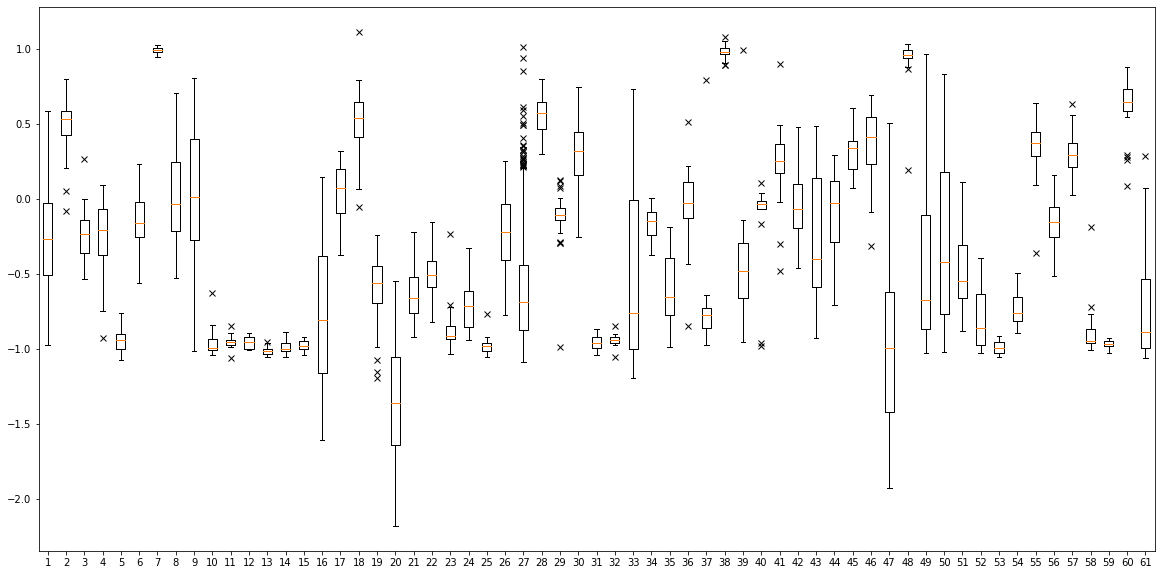

Feature is mean_y


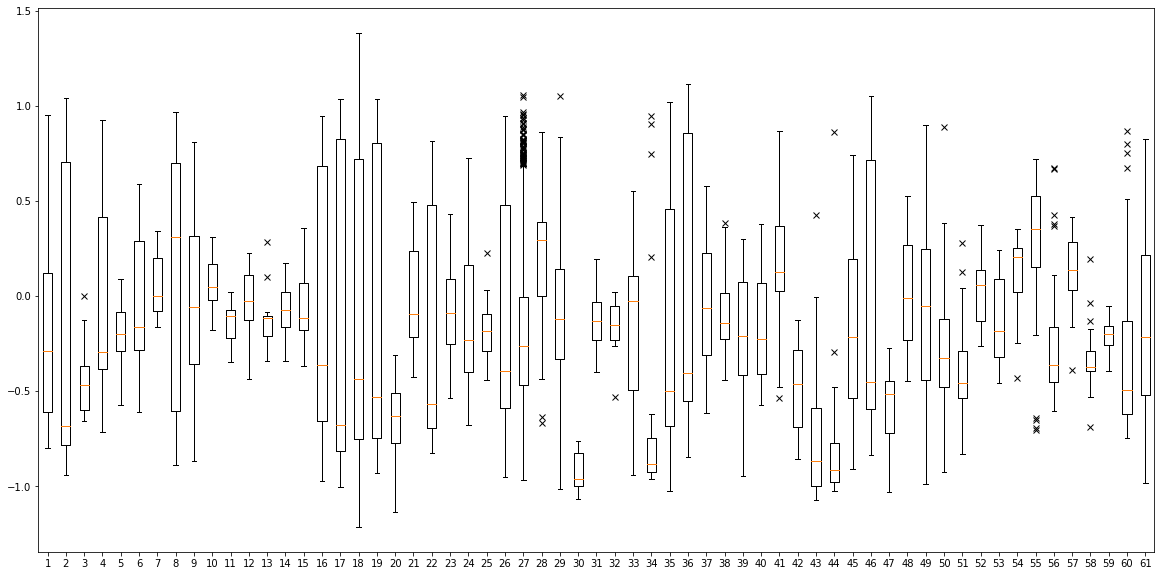

Feature is mean_z


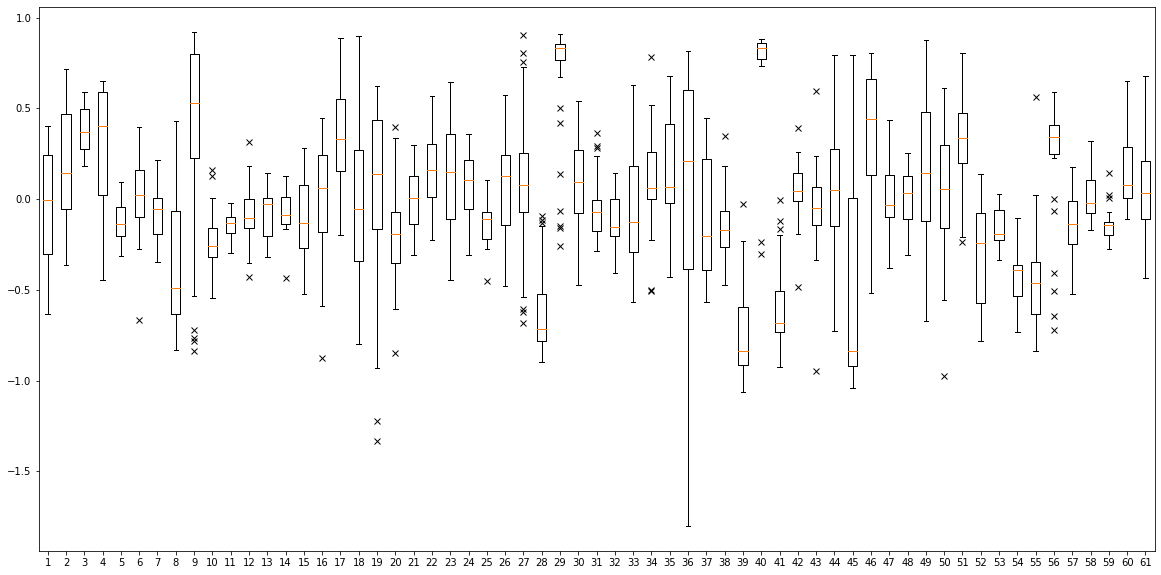

Feature is mag_x


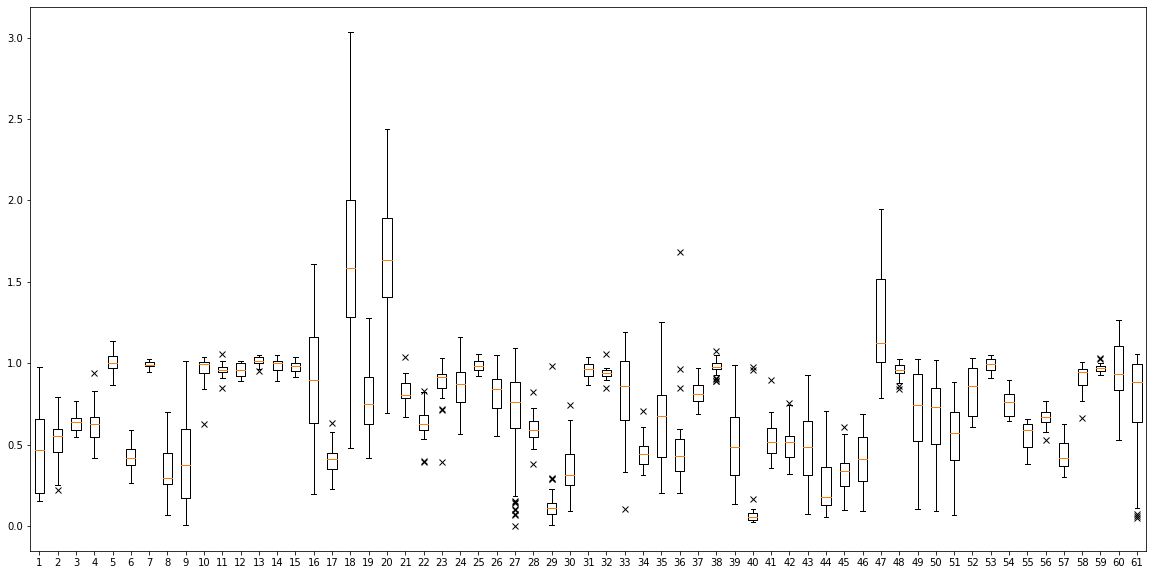

Feature is mag_y


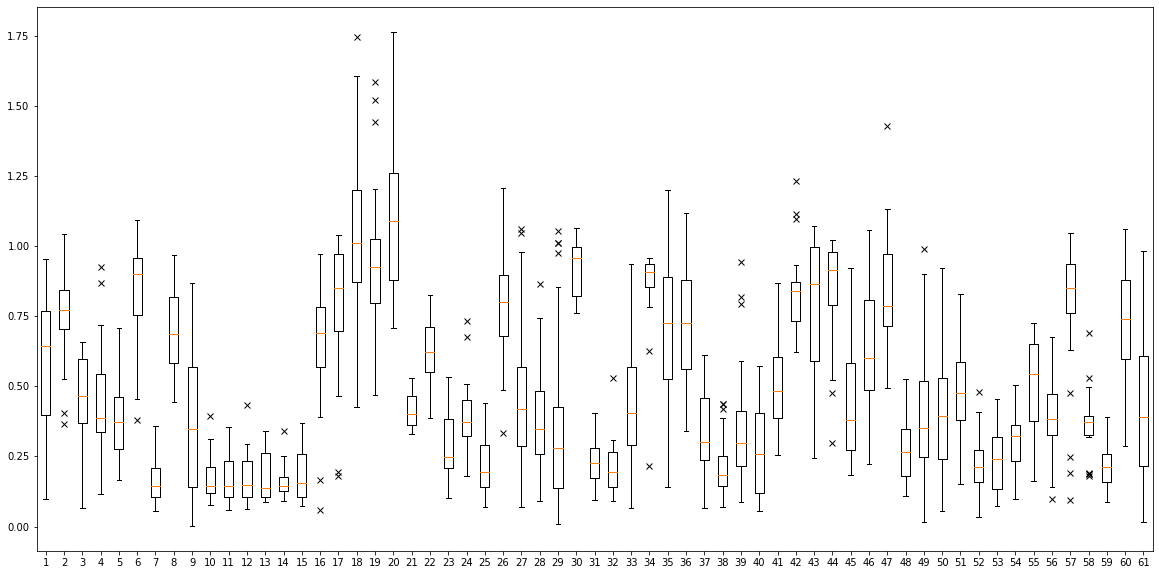

Feature is mag_z


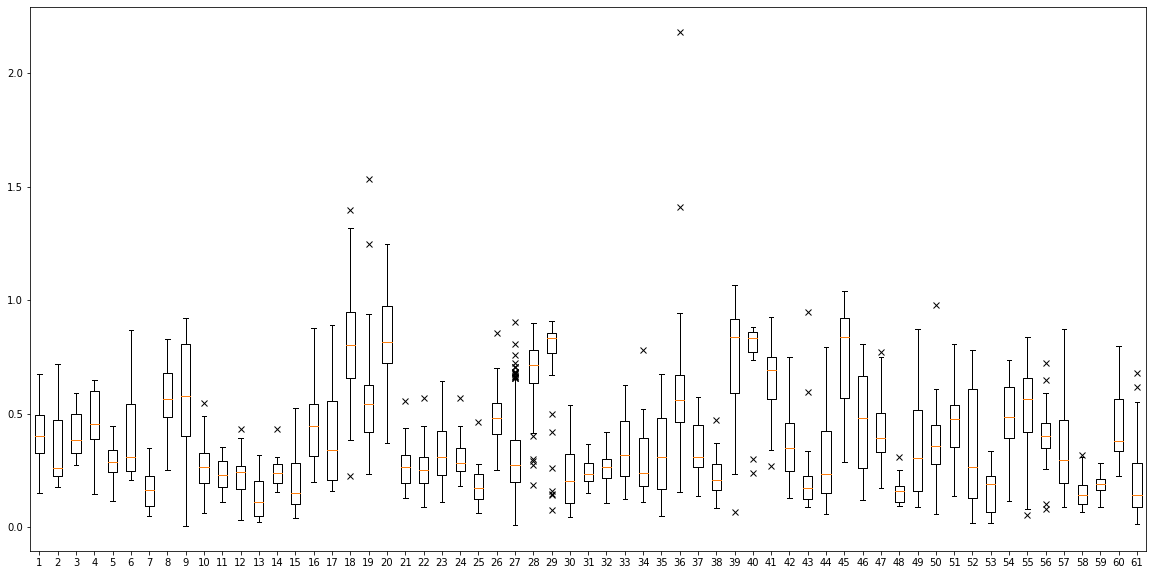

Feature is std_x


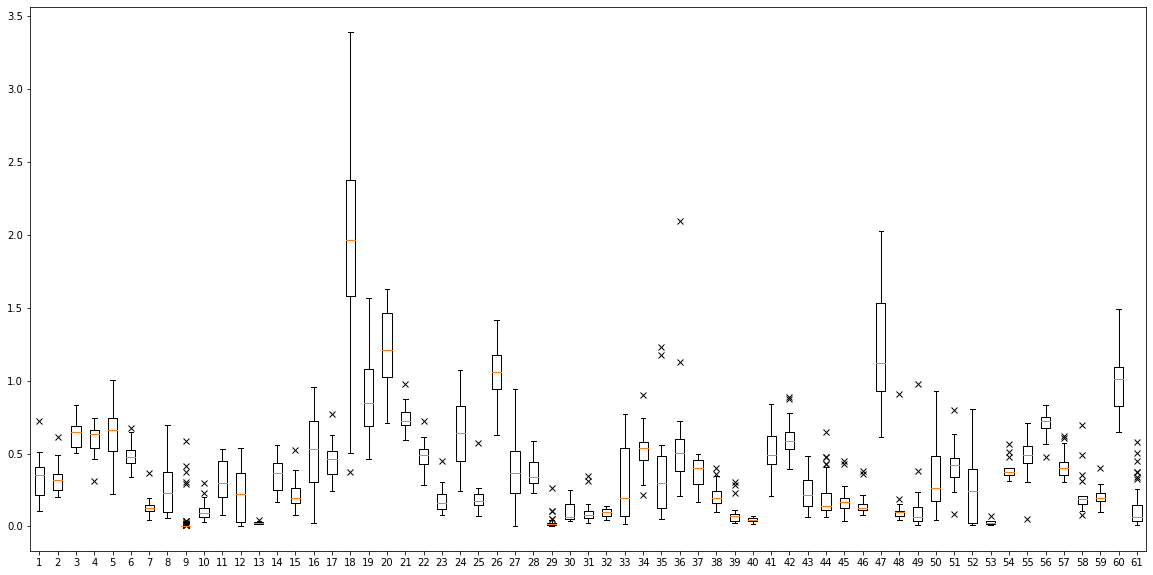

Feature is std_y


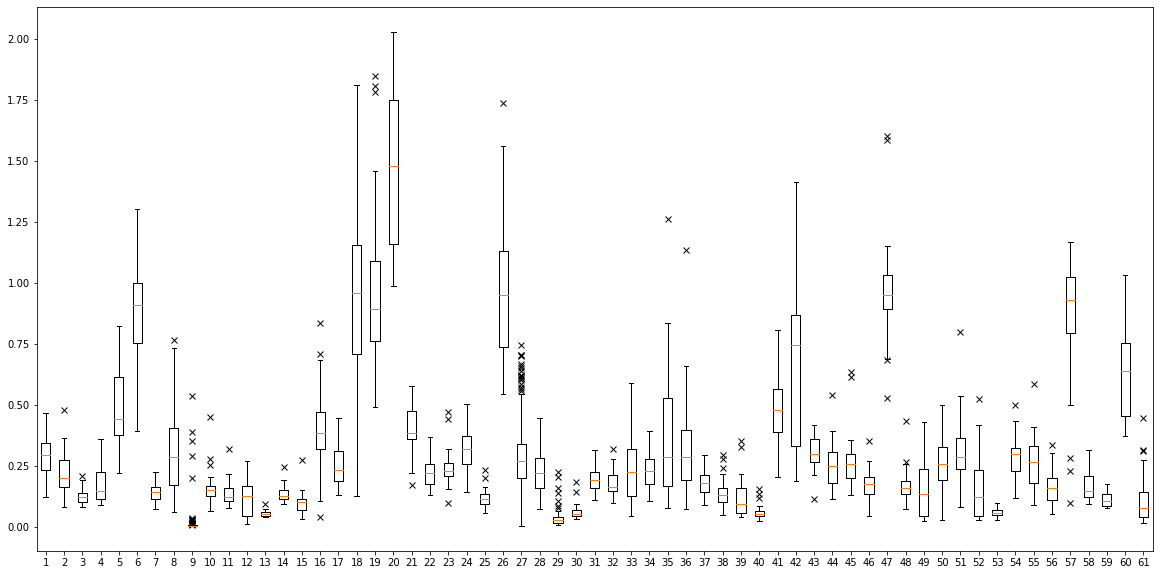

Feature is std_z


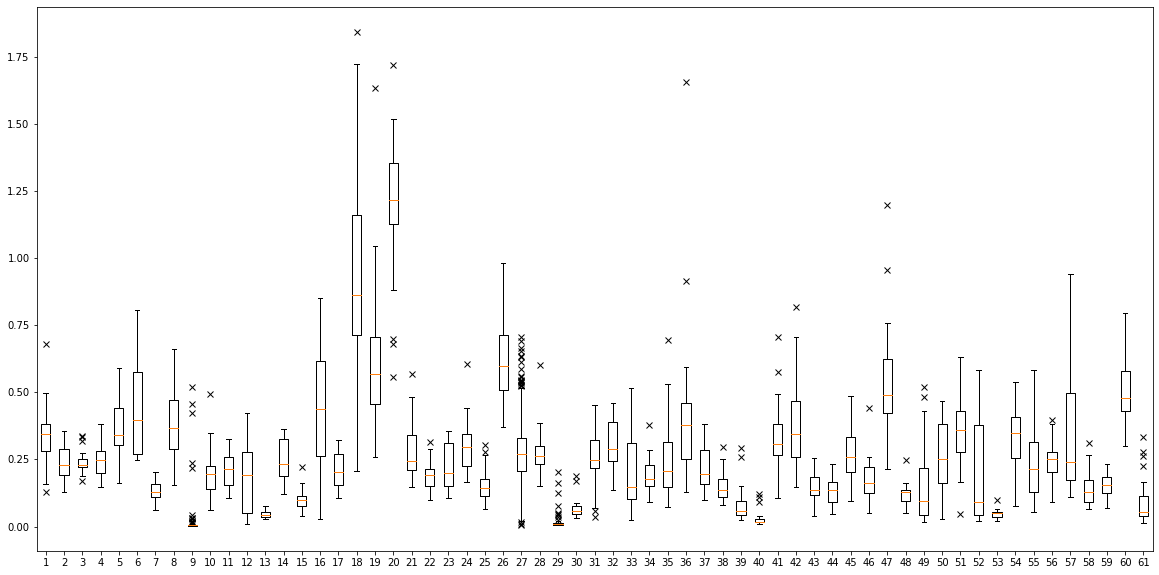

Feature is corr_x_y


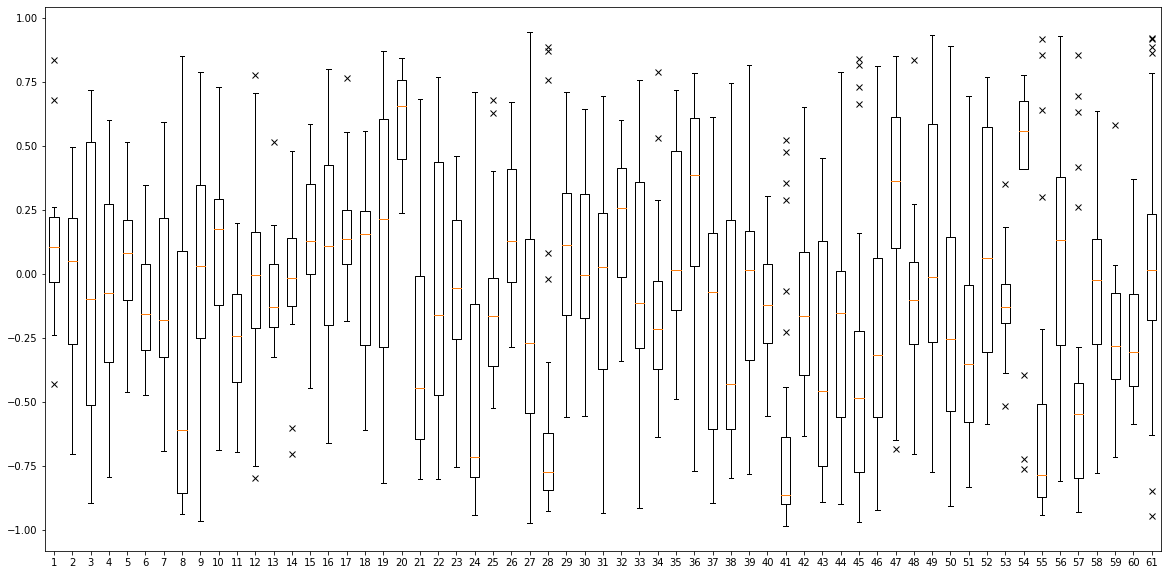

Feature is corr_y_z


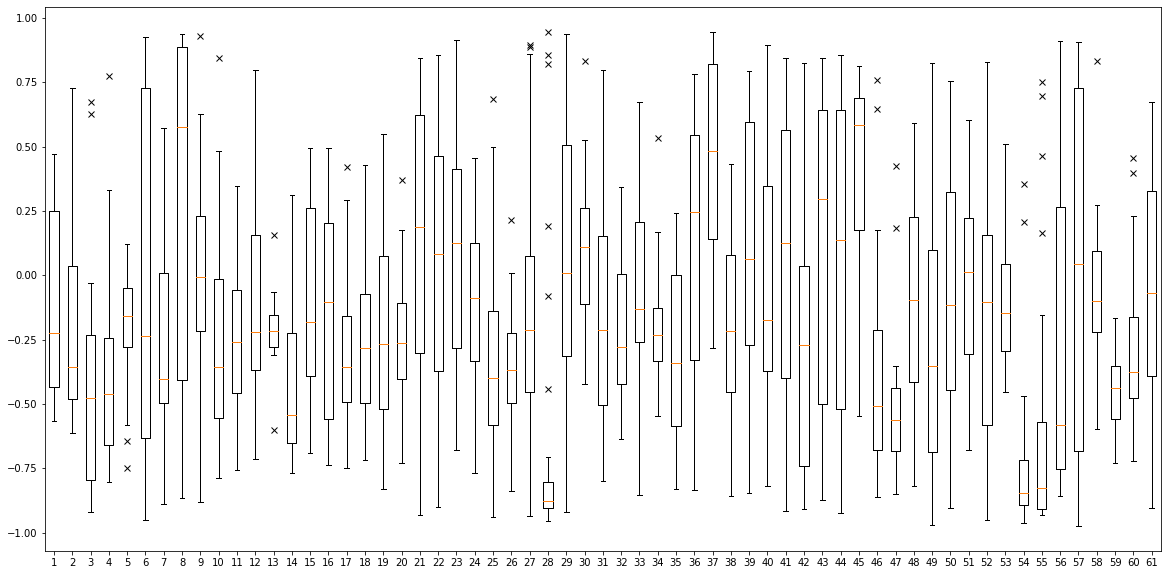

Feature is corr_z_x


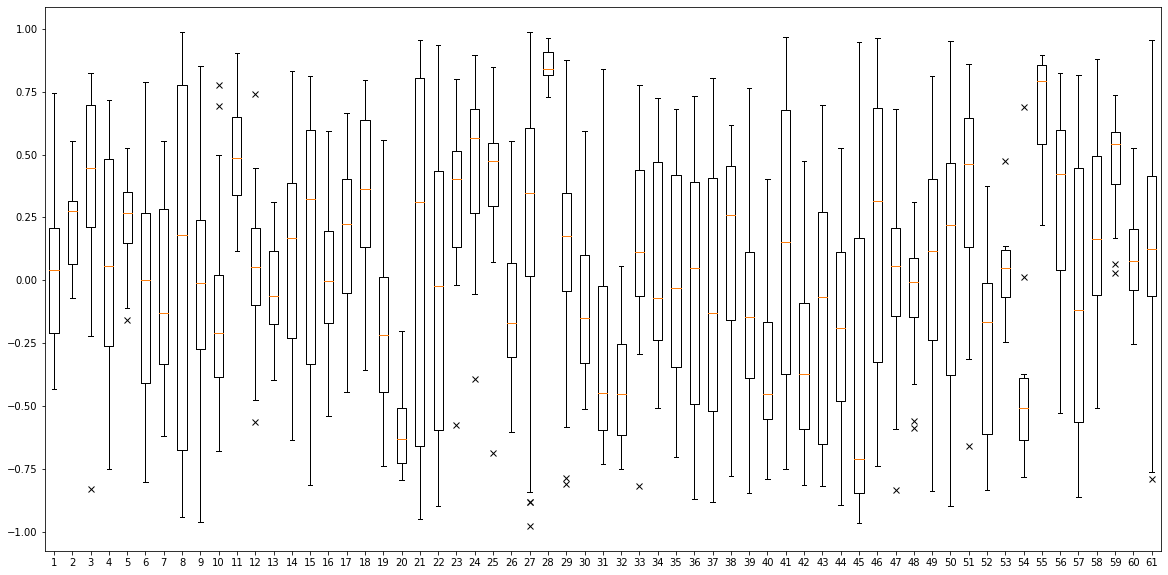

Feature is change_vec_start_end


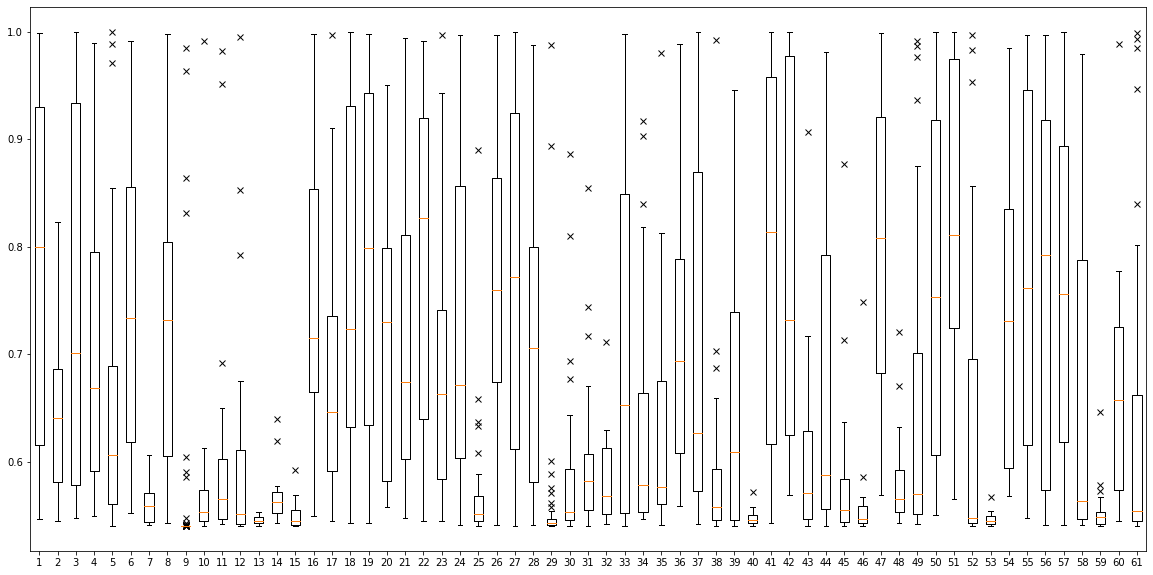

Feature is energy_x


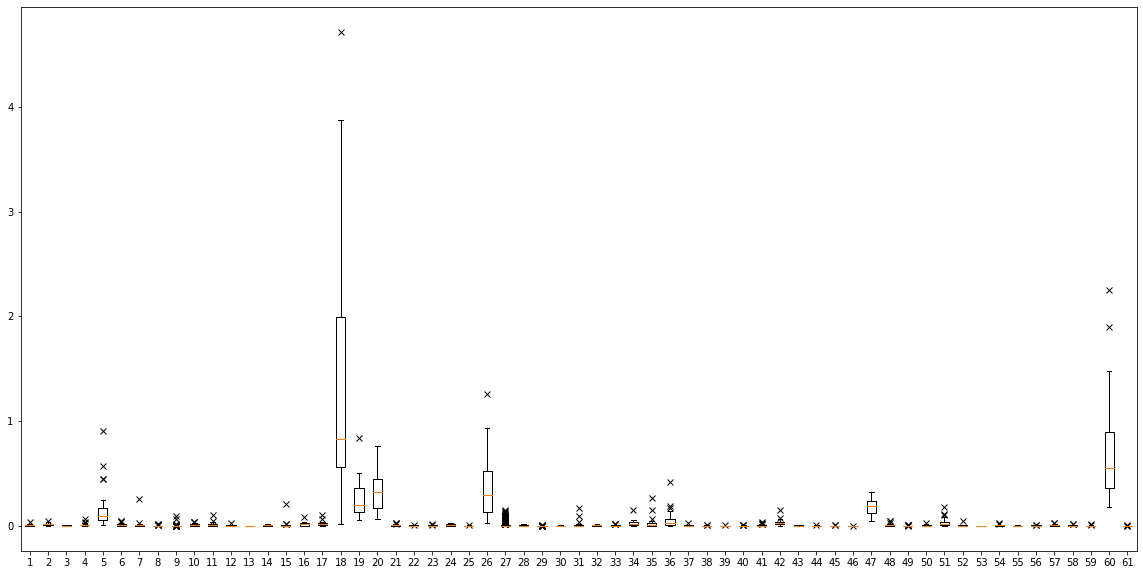

Feature is energy_y


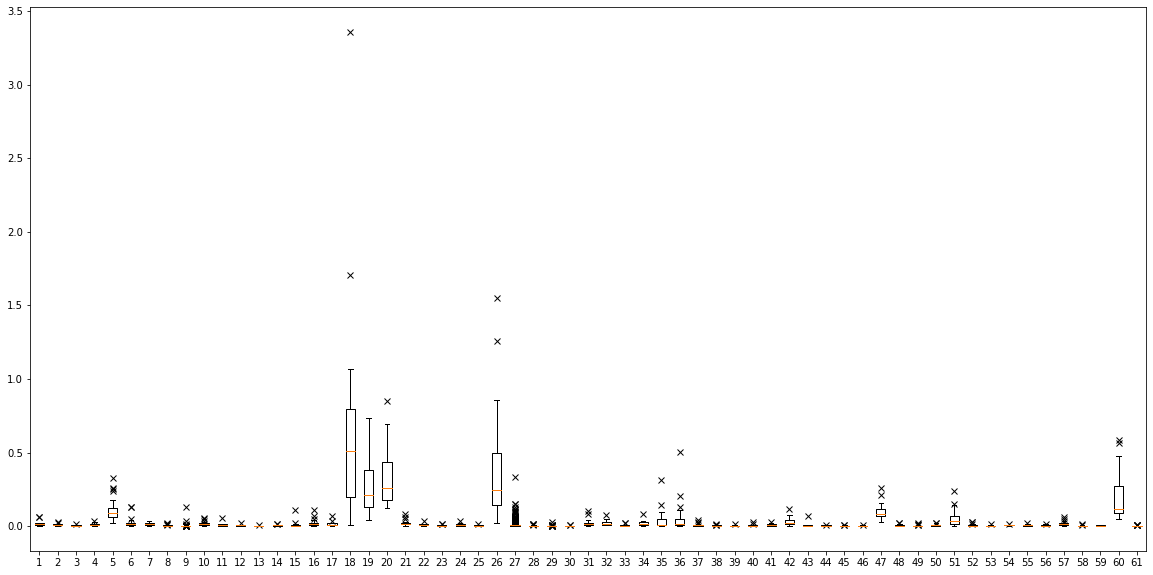

Feature is energy_z


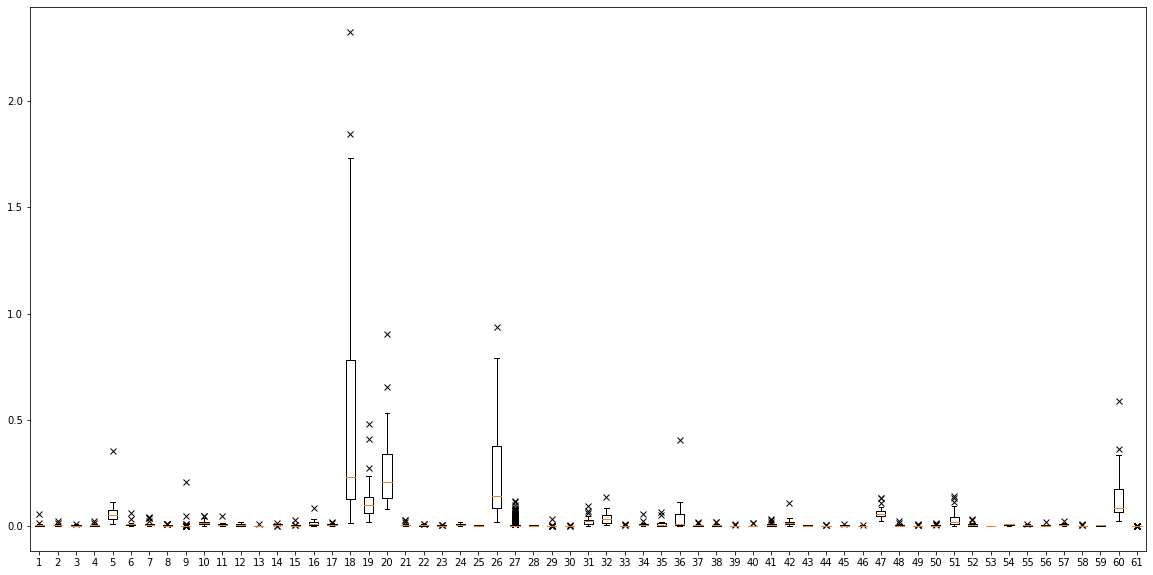

Feature is x_max_min_point_num


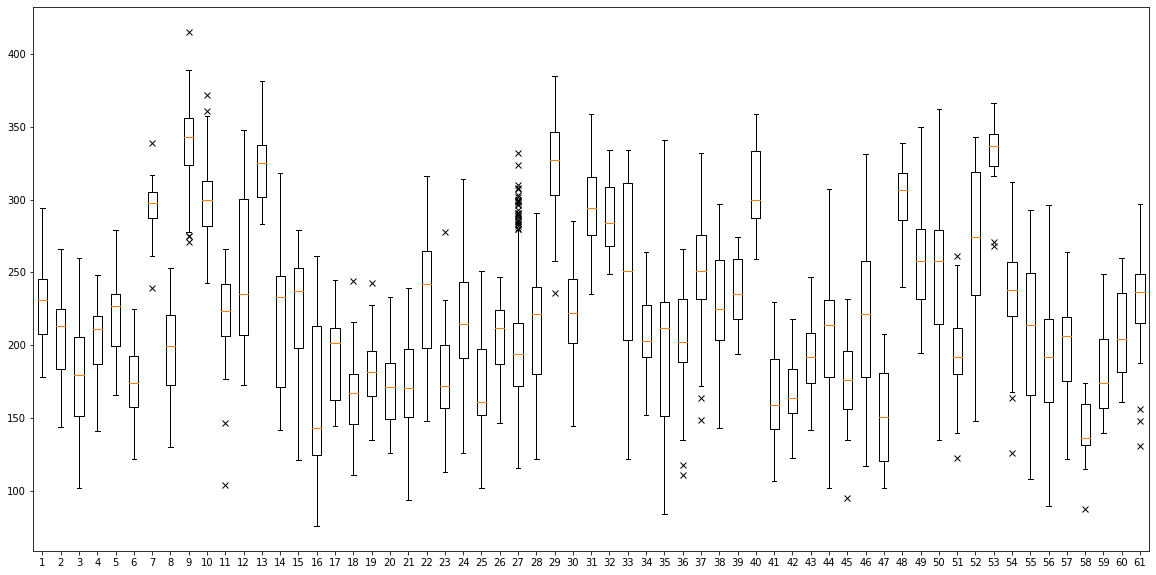

Feature is y_max_min_point_num


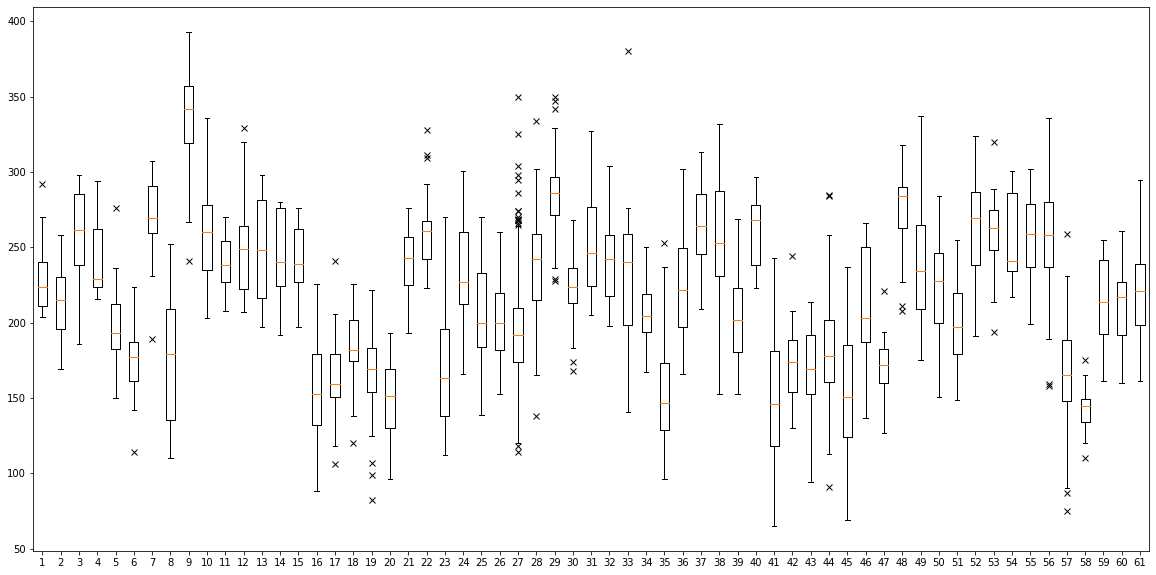

Feature is z_max_min_point_num


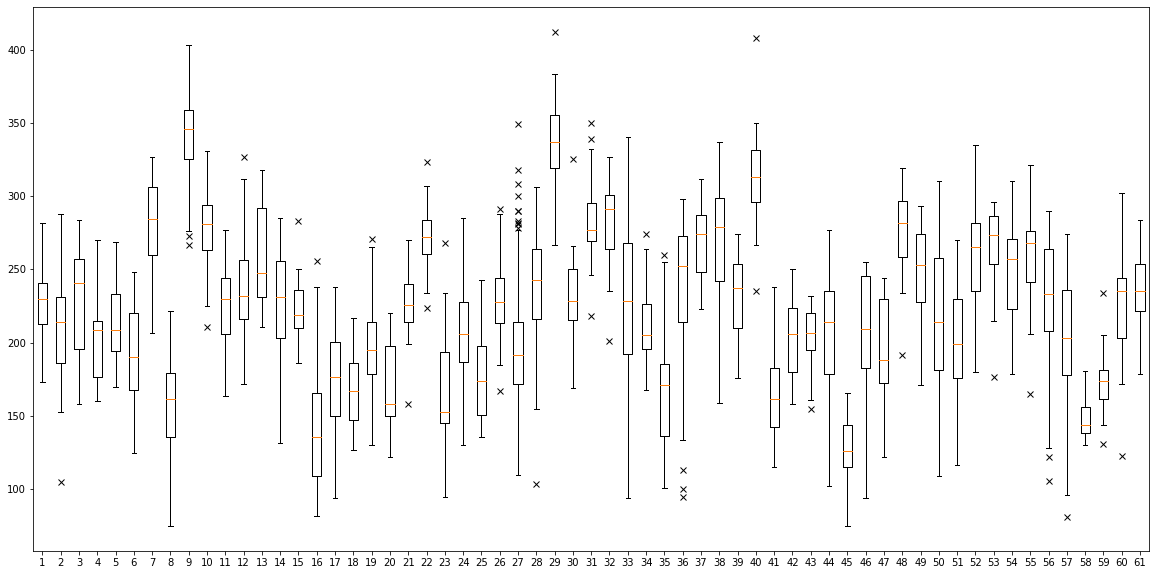

In [8]:
features_name_list = ["mean_x", "mean_y", "mean_z", "mag_x", "mag_y", "mag_z", "std_x", "std_y", "std_z",
                     "corr_x_y", "corr_y_z", "corr_z_x", "change_vec_start_end",
                     "energy_x", "energy_y", "energy_z",
                     "x_max_min_point_num", "y_max_min_point_num", "z_max_min_point_num"]

for feature_idx in range(19):
    print("Feature is {}".format(features_name_list[feature_idx]))
    feature_values_list=[]
    for id_idx in range(target_set.min(), target_set.max()+1):
        tmp = input_set[target_set == id_idx][:,feature_idx]
        feature_values_list.append(tmp)
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1,1,1)
    ax.boxplot(feature_values_list, sym="x")
    plt.show()

# Signal analysis

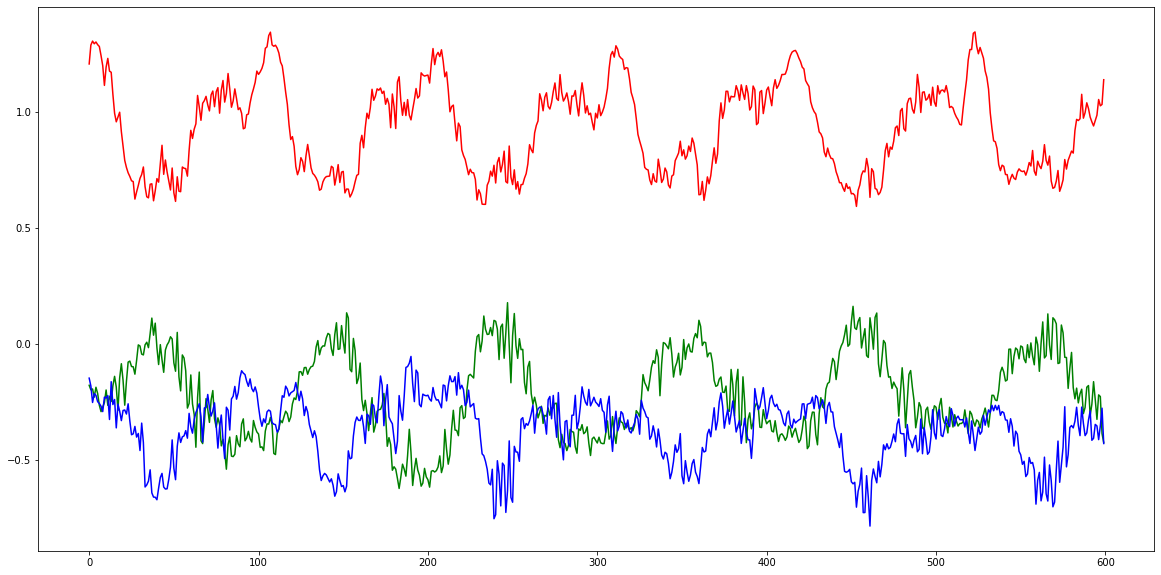

In [10]:
acc_x_sample = train_features[train_features.id==0].acc_x.values
acc_y_sample = train_features[train_features.id==0].acc_y.values
acc_z_sample = train_features[train_features.id==0].acc_z.values
time_arr = np.arange(len(acc_x_sample))


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
ax.plot(time_arr,acc_x_sample, color="r")
ax.plot(time_arr,acc_y_sample, color="g")
ax.plot(time_arr,acc_z_sample, color="b")
plt.show()

Apply cumulate features

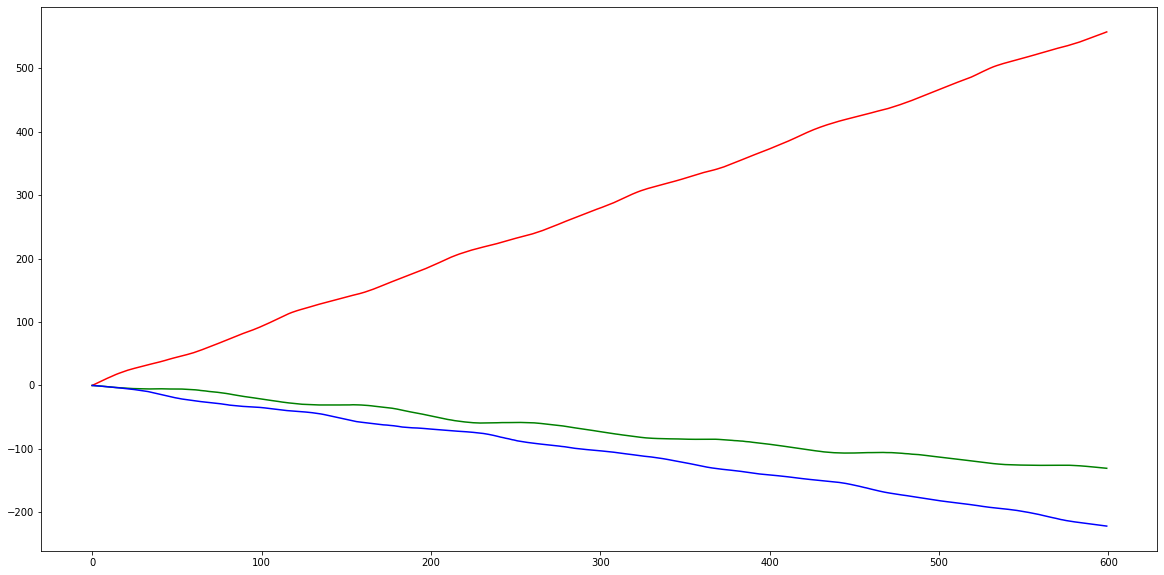

In [13]:
acc_x_cum_sample = []
acc_y_cum_sample = []
acc_z_cum_sample = []

for idx in range(len(acc_x_sample)):
    acc_x_cum_sample.append(sum(acc_x_sample[:idx]))
for idx in range(len(acc_y_sample)):
    acc_y_cum_sample.append(sum(acc_y_sample[:idx]))
for idx in range(len(acc_z_sample)):
    acc_z_cum_sample.append(sum(acc_z_sample[:idx]))

time_arr = np.arange(len(acc_x_cum_sample))

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
ax.plot(time_arr,acc_x_cum_sample, color="r")
ax.plot(time_arr,acc_y_cum_sample, color="g")
ax.plot(time_arr,acc_z_cum_sample, color="b")
plt.show()

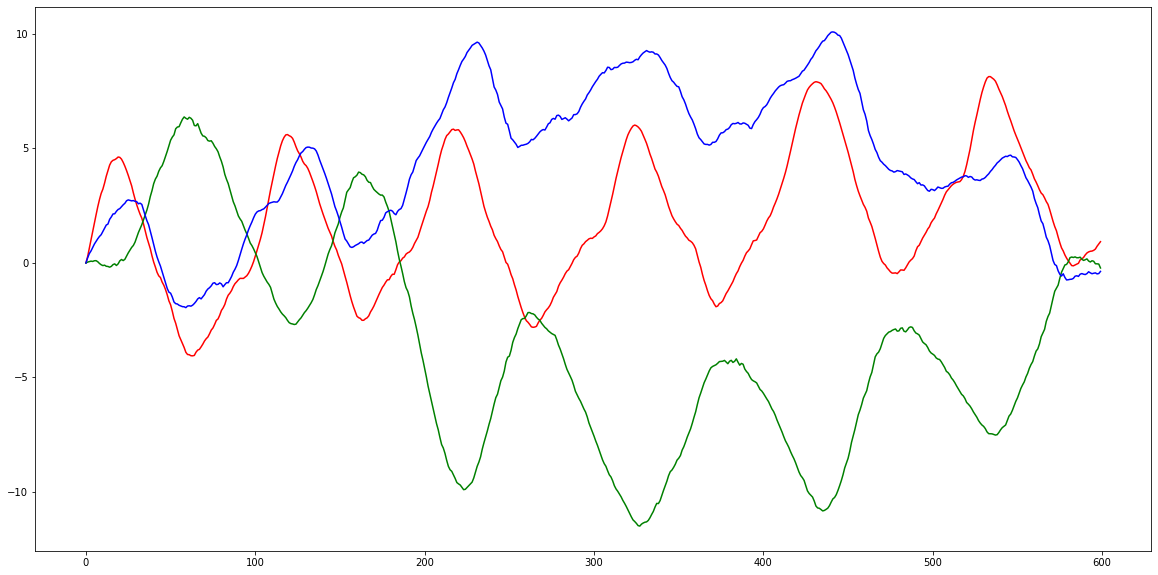

In [14]:
acc_x_cum_kl_sample = []
acc_y_cum_kl_sample = []
acc_z_cum_kl_sample = []

acc_x_principal_eigenvector = (acc_x_cum_sample[-1] - acc_x_cum_sample[0]) / len(acc_x_cum_sample)
acc_y_principal_eigenvector = (acc_y_cum_sample[-1] - acc_y_cum_sample[0]) / len(acc_y_cum_sample)
acc_z_principal_eigenvector = (acc_z_cum_sample[-1] - acc_z_cum_sample[0]) / len(acc_z_cum_sample)

for idx in range(len(acc_x_sample)):
    acc_x_cum_kl_sample.append( acc_x_cum_sample[idx] - (acc_x_principal_eigenvector*idx) )
    
for idx in range(len(acc_y_sample)):
    acc_y_cum_kl_sample.append( acc_y_cum_sample[idx] - (acc_y_principal_eigenvector*idx) )
    
for idx in range(len(acc_z_sample)):
    acc_z_cum_kl_sample.append( acc_z_cum_sample[idx] - (acc_z_principal_eigenvector*idx) )

time_arr = np.arange(len(acc_x_cum_kl_sample))

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
ax.plot(time_arr,acc_x_cum_kl_sample, color="r")
ax.plot(time_arr,acc_y_cum_kl_sample, color="g")
ax.plot(time_arr,acc_z_cum_kl_sample, color="b")
plt.show()

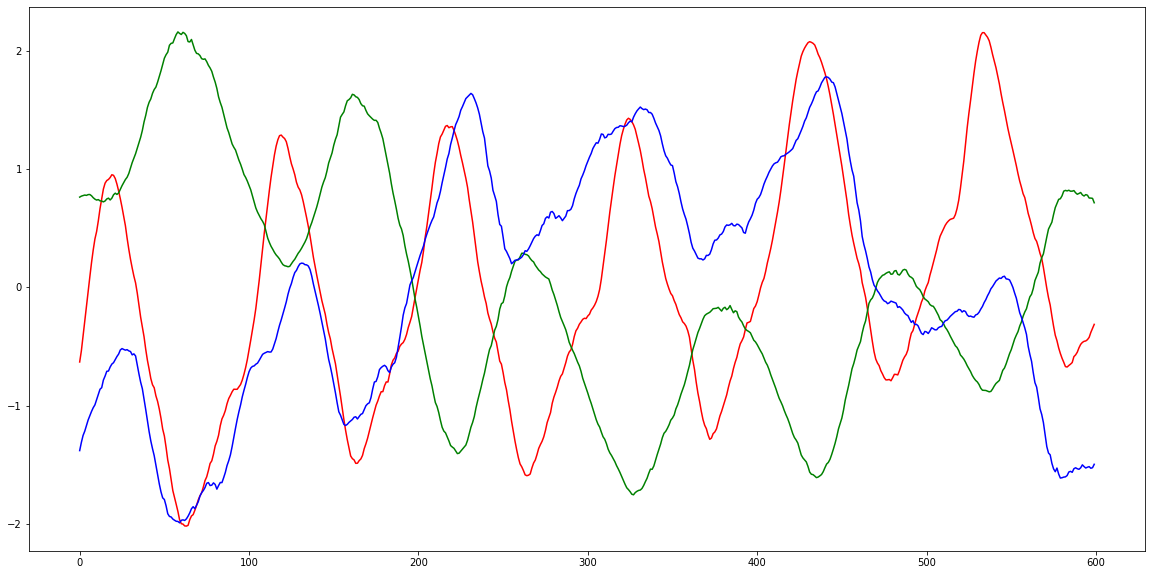

In [18]:
acc_x_cum_kl_sample_mean = np.array(acc_x_cum_kl_sample).mean()
acc_x_cum_kl_sample_std = np.array(acc_x_cum_kl_sample).std()
acc_x_cum_kl_norm_sample = (acc_x_cum_kl_sample - acc_x_cum_kl_sample_mean) / acc_x_cum_kl_sample_std

acc_y_cum_kl_sample_mean = np.array(acc_y_cum_kl_sample).mean()
acc_y_cum_kl_sample_std = np.array(acc_y_cum_kl_sample).std()
acc_y_cum_kl_norm_sample = (acc_y_cum_kl_sample - acc_y_cum_kl_sample_mean) / acc_y_cum_kl_sample_std

acc_z_cum_kl_sample_mean = np.array(acc_z_cum_kl_sample).mean()
acc_z_cum_kl_sample_std = np.array(acc_z_cum_kl_sample).std()
acc_z_cum_kl_norm_sample = (acc_z_cum_kl_sample - acc_z_cum_kl_sample_mean) / acc_z_cum_kl_sample_std


time_arr = np.arange(len(acc_x_cum_kl_norm_sample))

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
ax.plot(time_arr,acc_x_cum_kl_norm_sample, color="r")
ax.plot(time_arr,acc_y_cum_kl_norm_sample, color="g")
ax.plot(time_arr,acc_z_cum_kl_norm_sample, color="b")
plt.show()

패턴의 반복이 보임

하나의 동작만 추출할 수 없나? -> 신호 분석으로 할 수도 있을 듯 한데....(푸리에 변환)

비교 시도
1. 변환 후 통계량 사용
2. 변환 후 푸리에 변환
3. 변환 후 통계량, 푸리에 변환 모두 사용